In [1]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Pathing
import sys
sys.path.append("../src")
from os.path import join
from results import prefix

# Results
import results
reload(results)
print 'Done.'

Done.


In [2]:
Results = results.Results
ID = 16
date = '2016_07_05'
r = Results(date, ID)
print join('/home/luka/v/lm1015-tmp/data',join(date,prefix(ID,3)))
r.print_config()

Aim:
Network Search
/home/luka/v/lm1015-tmp/data/2016_07_05/016
global


dropout_rate,1.0
optimizer,adam
seed_randomness,True
fc2_neuron_count,0
learning_rate,0.001
batch_size,100
final_activation,softmax
fc1_neuron_count,0
seed,1
iterations,500
dump_frames,False


results


early_stop_iteration,130


crop


crop,"[0, 0, 0, 0]"
resize_scale,0.4


weights


weights initialisation,"['std_dev', 0.001]"
bias initial value,0.01


data


image_region,full
remove_empty_labels,False
validation_subjects,"[1, 3, 5, 7, 9, 11, 13, 17, 21, 24, 26, 28, 30, 32]"
batch_randomisation,True
dataset,disfa
image_shape,"[47, 47]"
train_subjects,"[2, 4, 6, 8, 10, 12, 16, 18, 23, 25, 27, 29, 31]"
test_subjects,"[1, 3, 5, 7, 9, 11, 13, 17, 21, 24, 26, 28, 30, 32]"
disfa_au_map,"[1, 2, 4, 5, 6, 9, 12, 15, 17, 20, 25, 26]"
threshold,1
normalisation_type,face


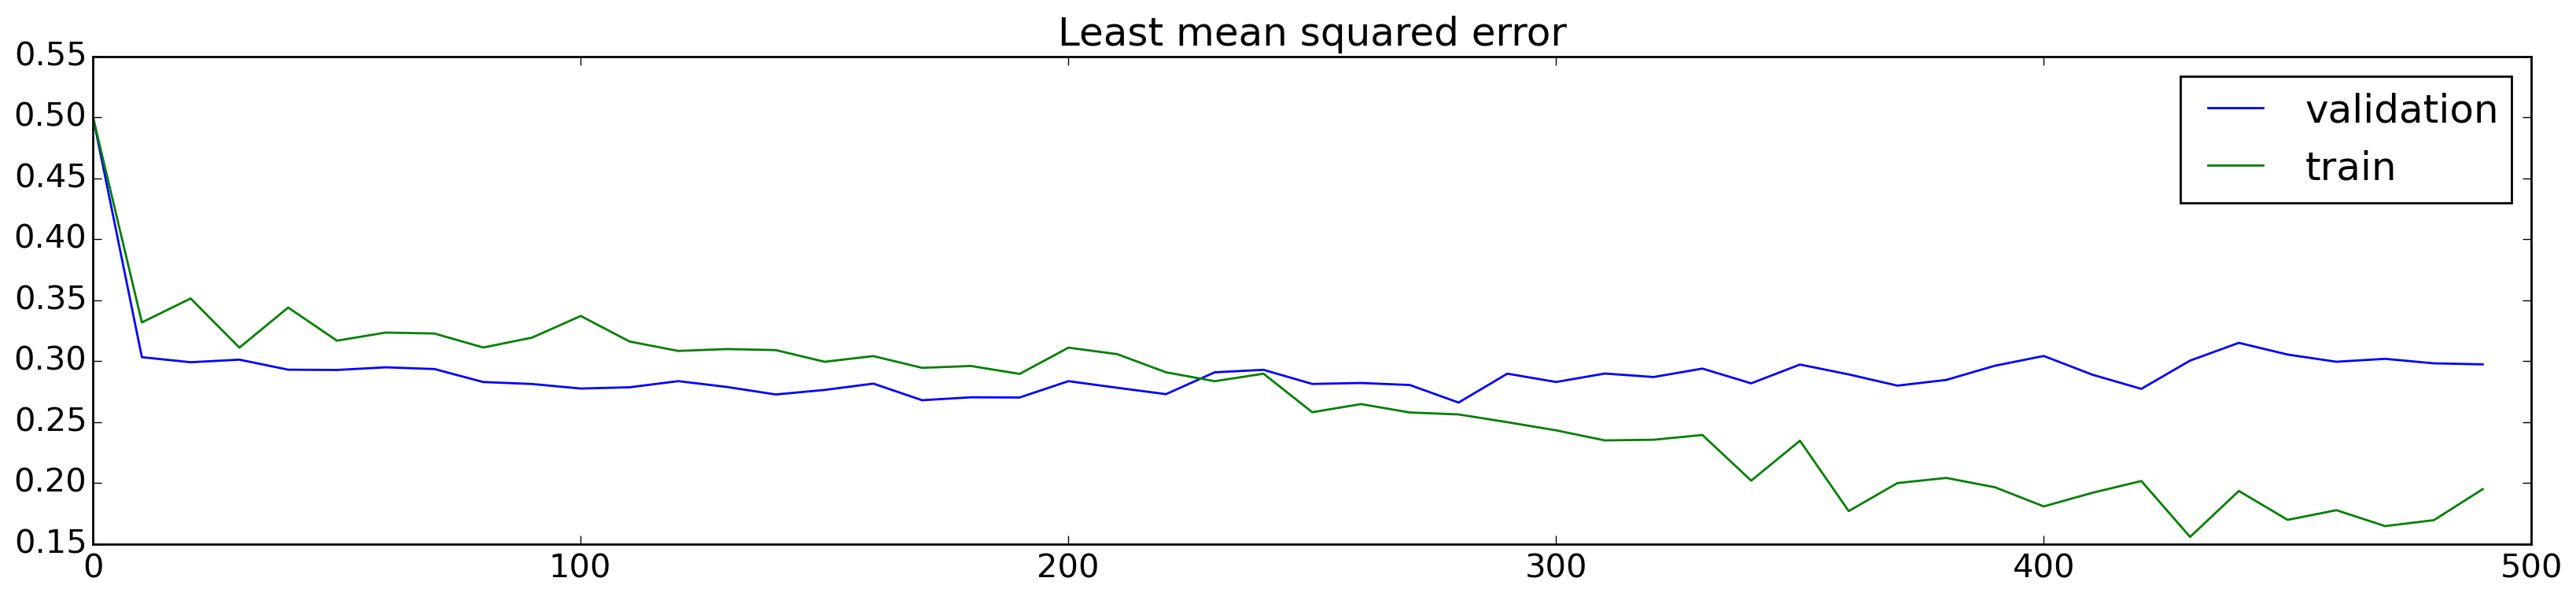

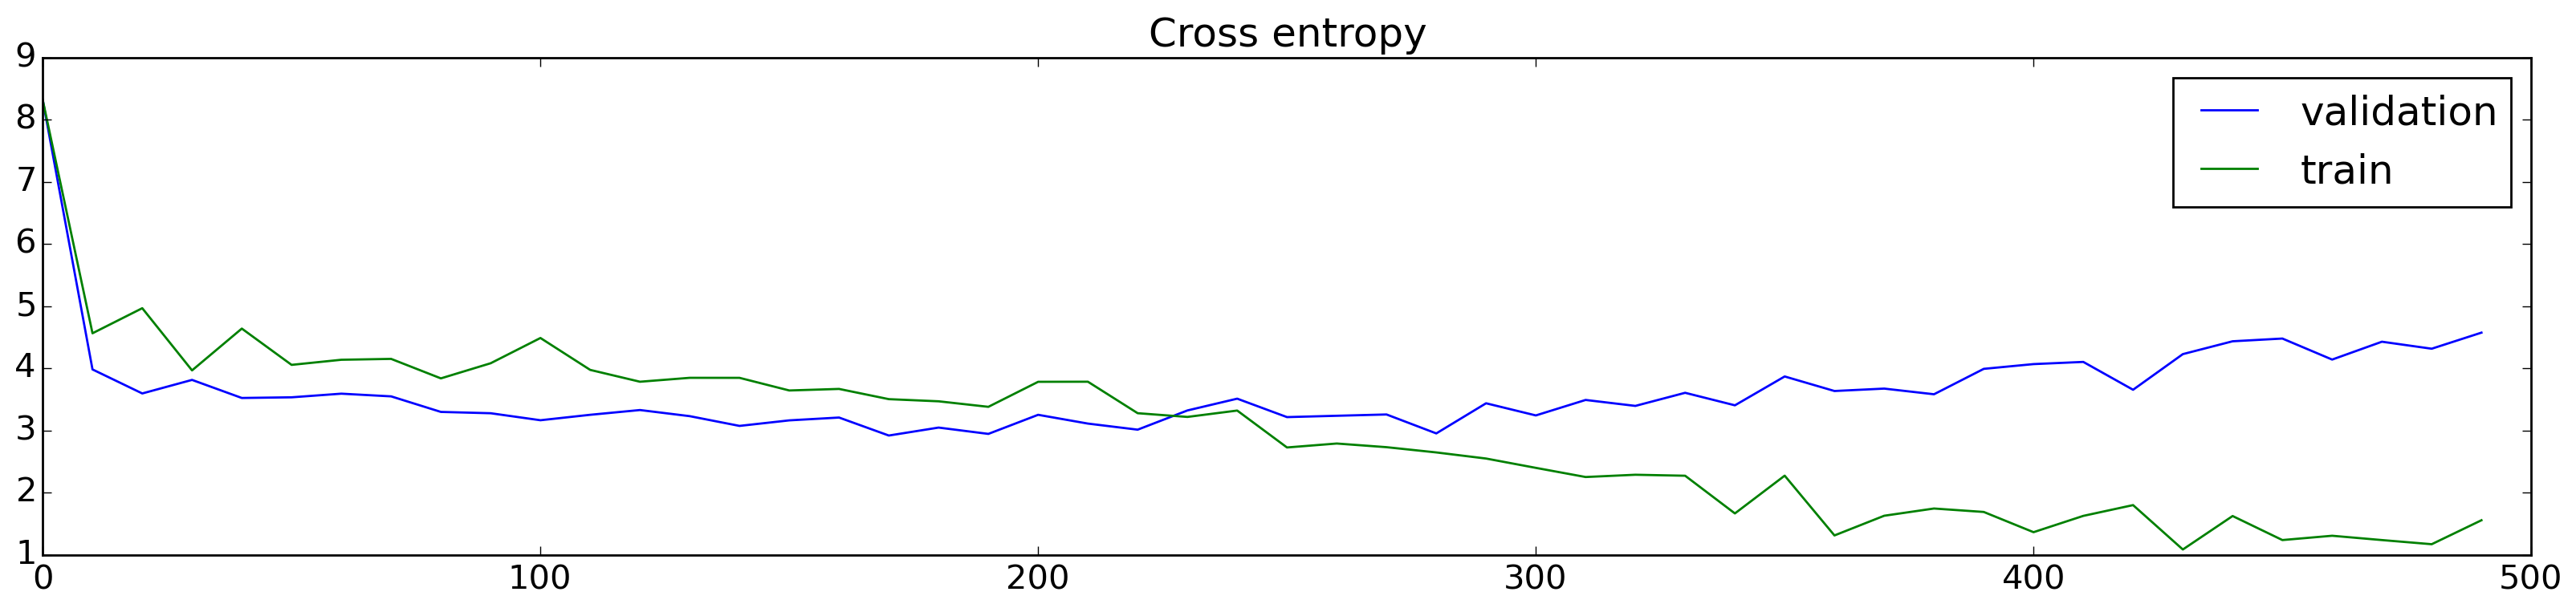

In [3]:
r.lmsq()
r.cross()

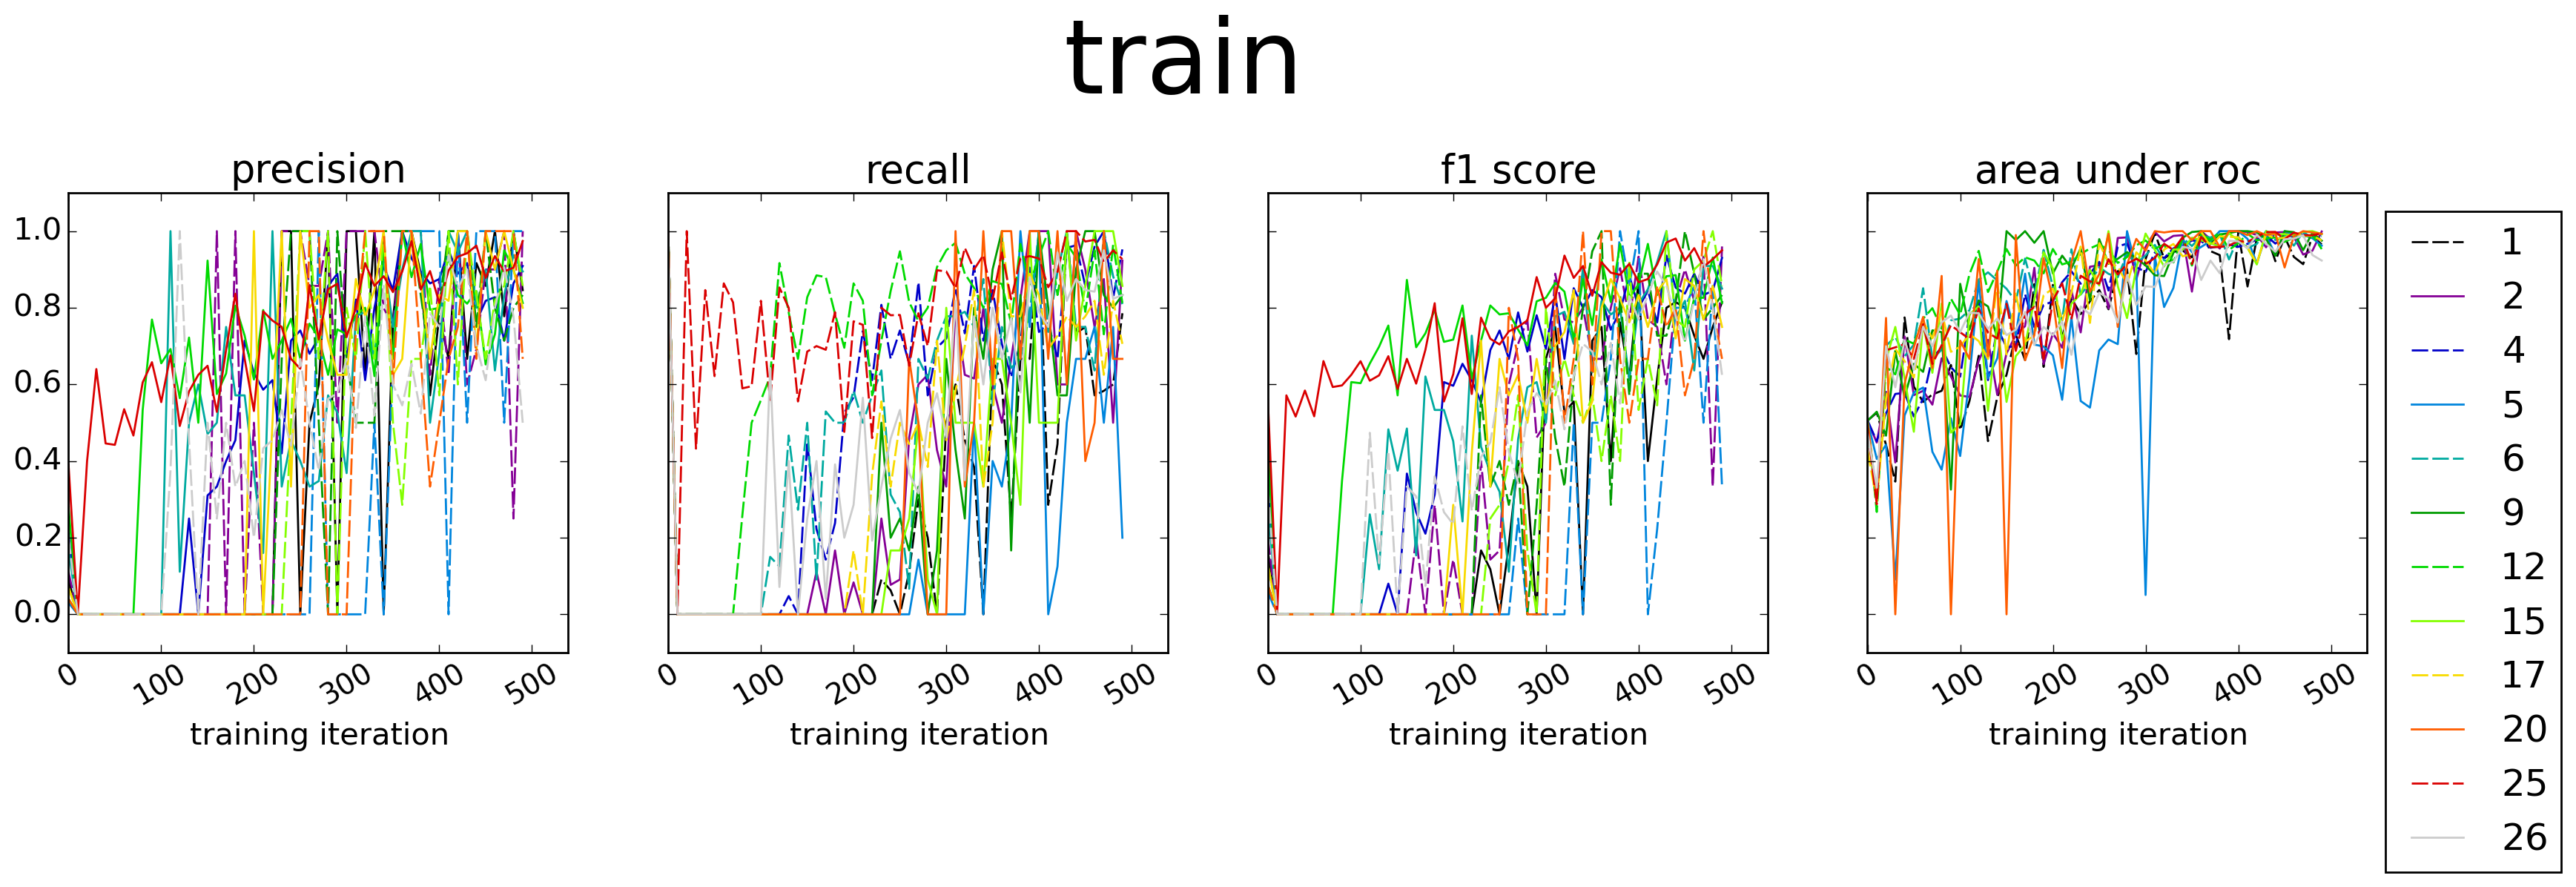

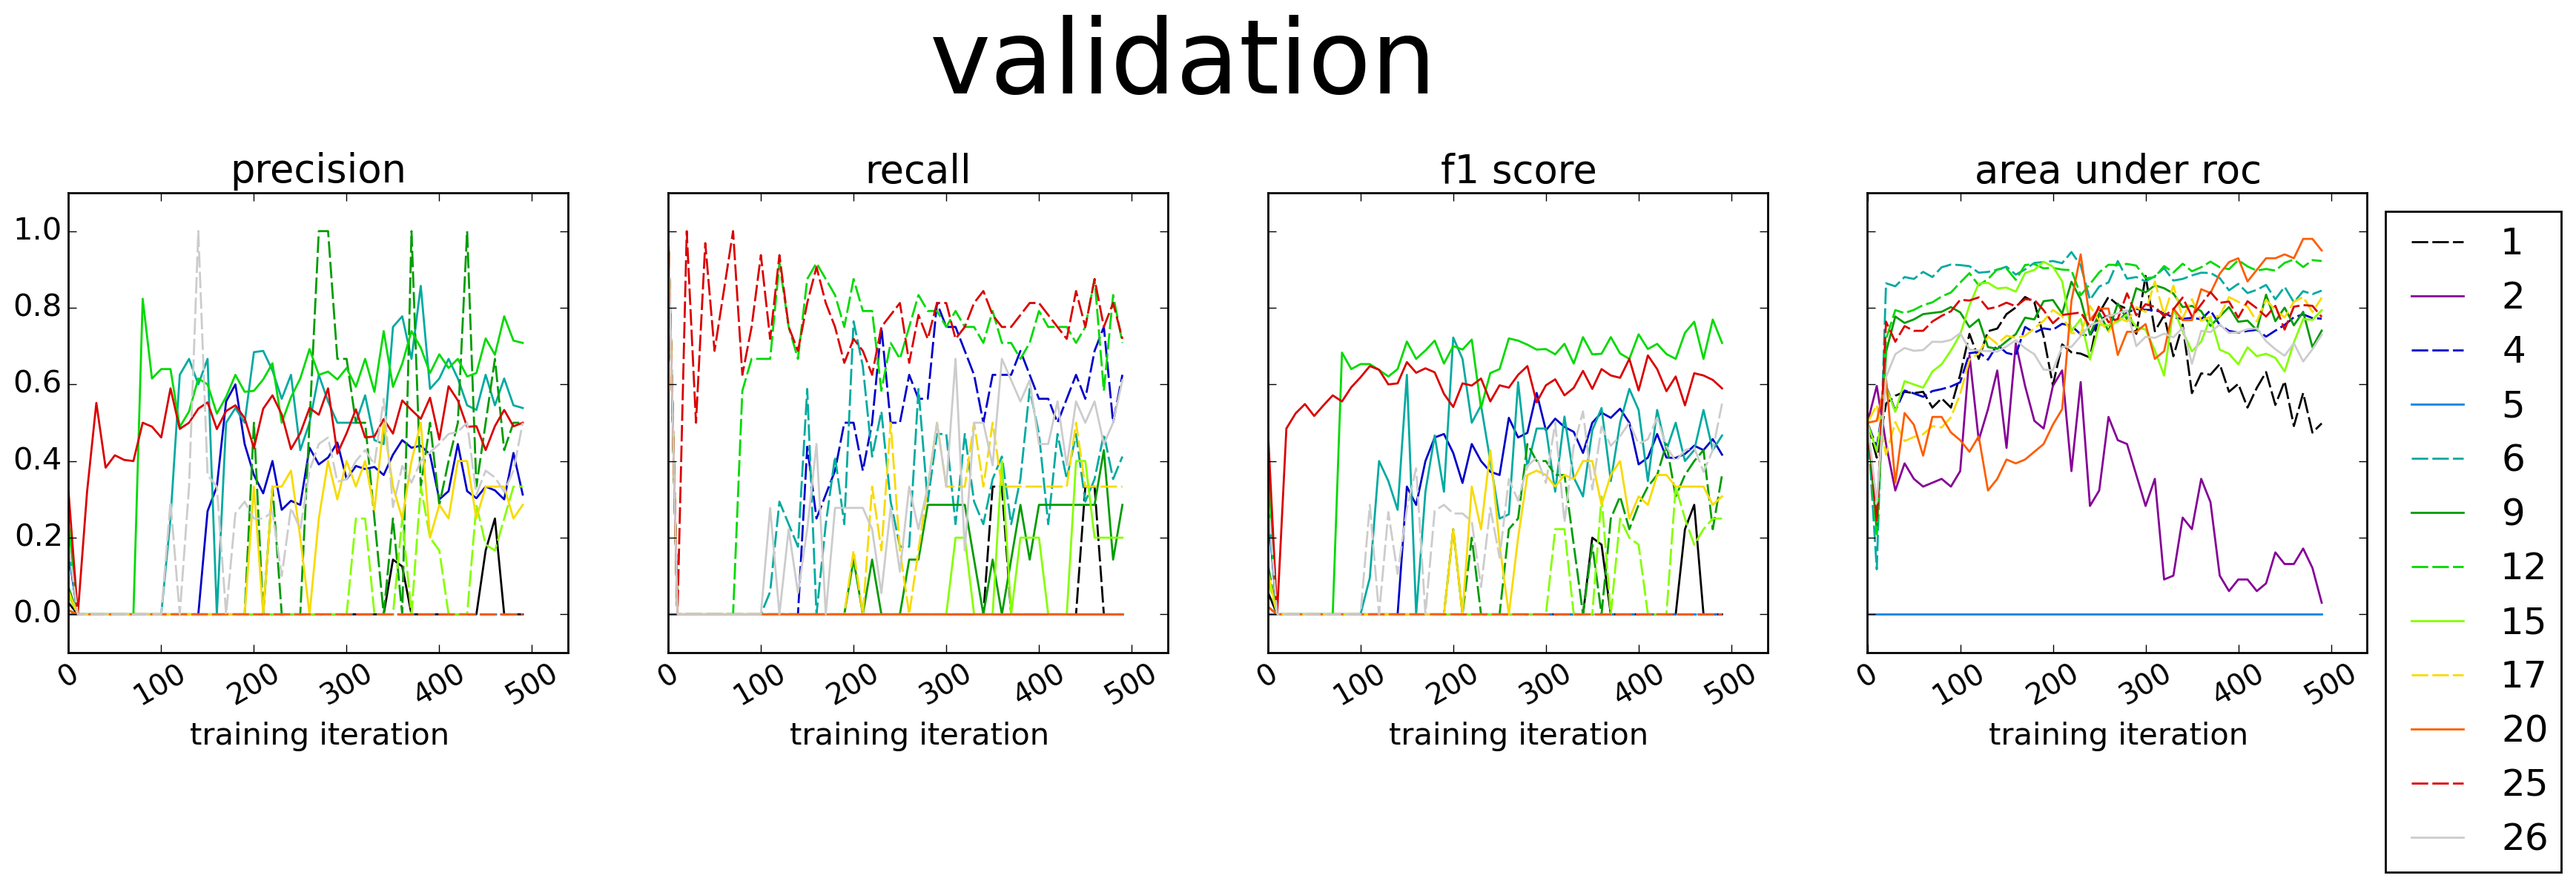

In [4]:
r.au('train',smooth=False)
r.au('validation',smooth=False)
# r.roc_plot('final')
# r.roc_plot('early')
# r.test_confusion('early')

# Test set:

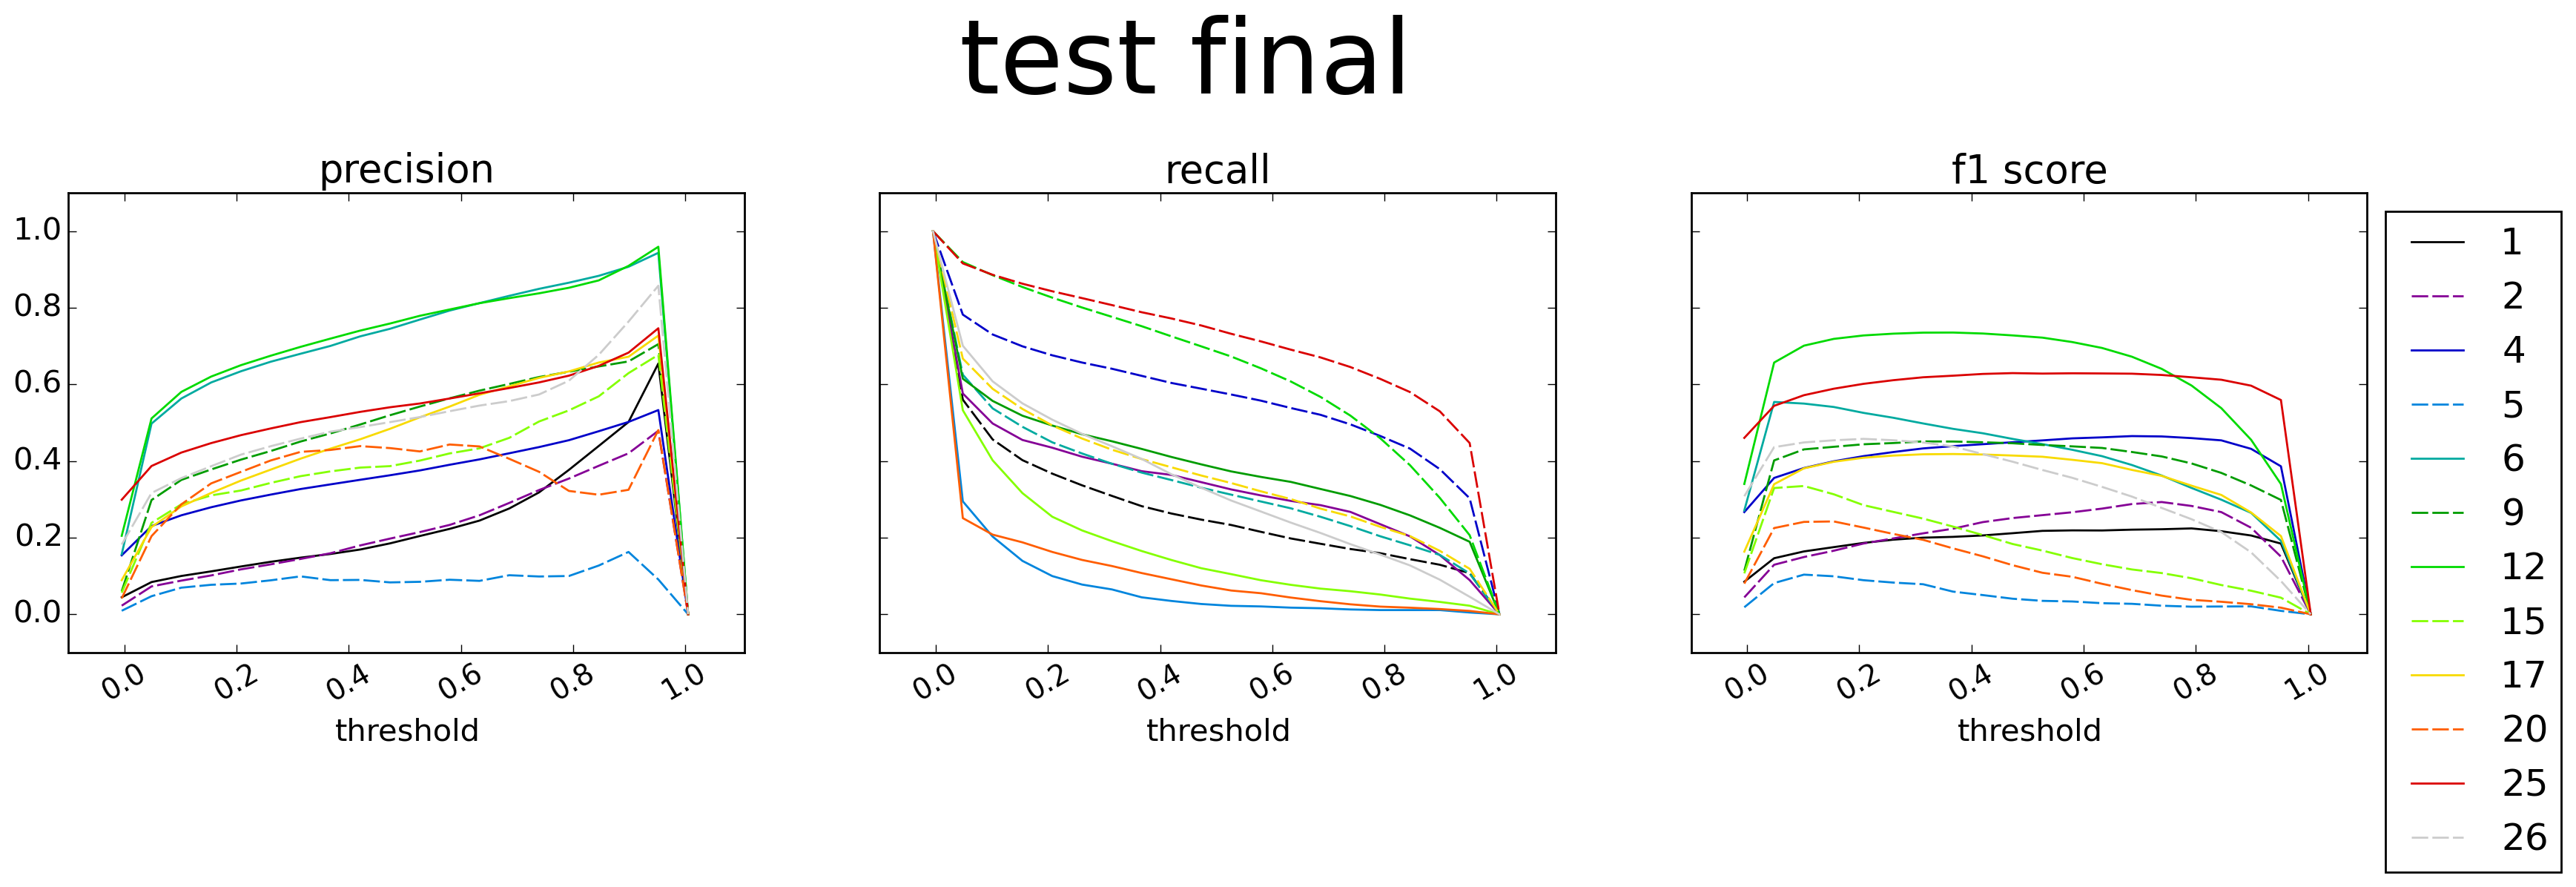

Test ROC values for each class:
(values for p,r,f1 are maximums)
class	roc	roc	f1	p	r	
1 	0.68 	poor 	0.22 	0.65 	1.0
2 	0.76 	fair 	0.29 	0.48 	1.0
4 	0.76 	fair 	0.47 	0.53 	1.0
5 	0.78 	fair 	0.1 	0.16 	1.0
6 	0.84 	good 	0.55 	0.94 	1.0
9 	0.85 	good 	0.45 	0.71 	1.0
12 	0.93 	great 	0.74 	0.96 	1.0
15 	0.85 	good 	0.33 	0.68 	1.0
17 	0.81 	good 	0.42 	0.73 	1.0
20 	0.68 	poor 	0.24 	0.48 	1.0
25 	0.81 	good 	0.63 	0.75 	1.0
26 	0.75 	fair 	0.46 	0.86 	1.0
average roc =  0.790443261755
best thresholds
au	best roc	best f1		col3-col2
1 	0.07 		0.79 		0.72
2 	0.02 		0.74 		0.72
4 	0.36 		0.69 		0.33
5 	0.01 		0.1 		0.09
6 	0.01 		0.05 		0.04
9 	0.02 		0.31 		0.29
12 	0.12 		0.37 		0.25
15 	0.01 		0.1 		0.09
17 	0.05 		0.37 		0.32
20 	0.01 		0.15 		0.14
25 	0.46 		0.47 		0.01
26 	0.08 		0.21 		0.13


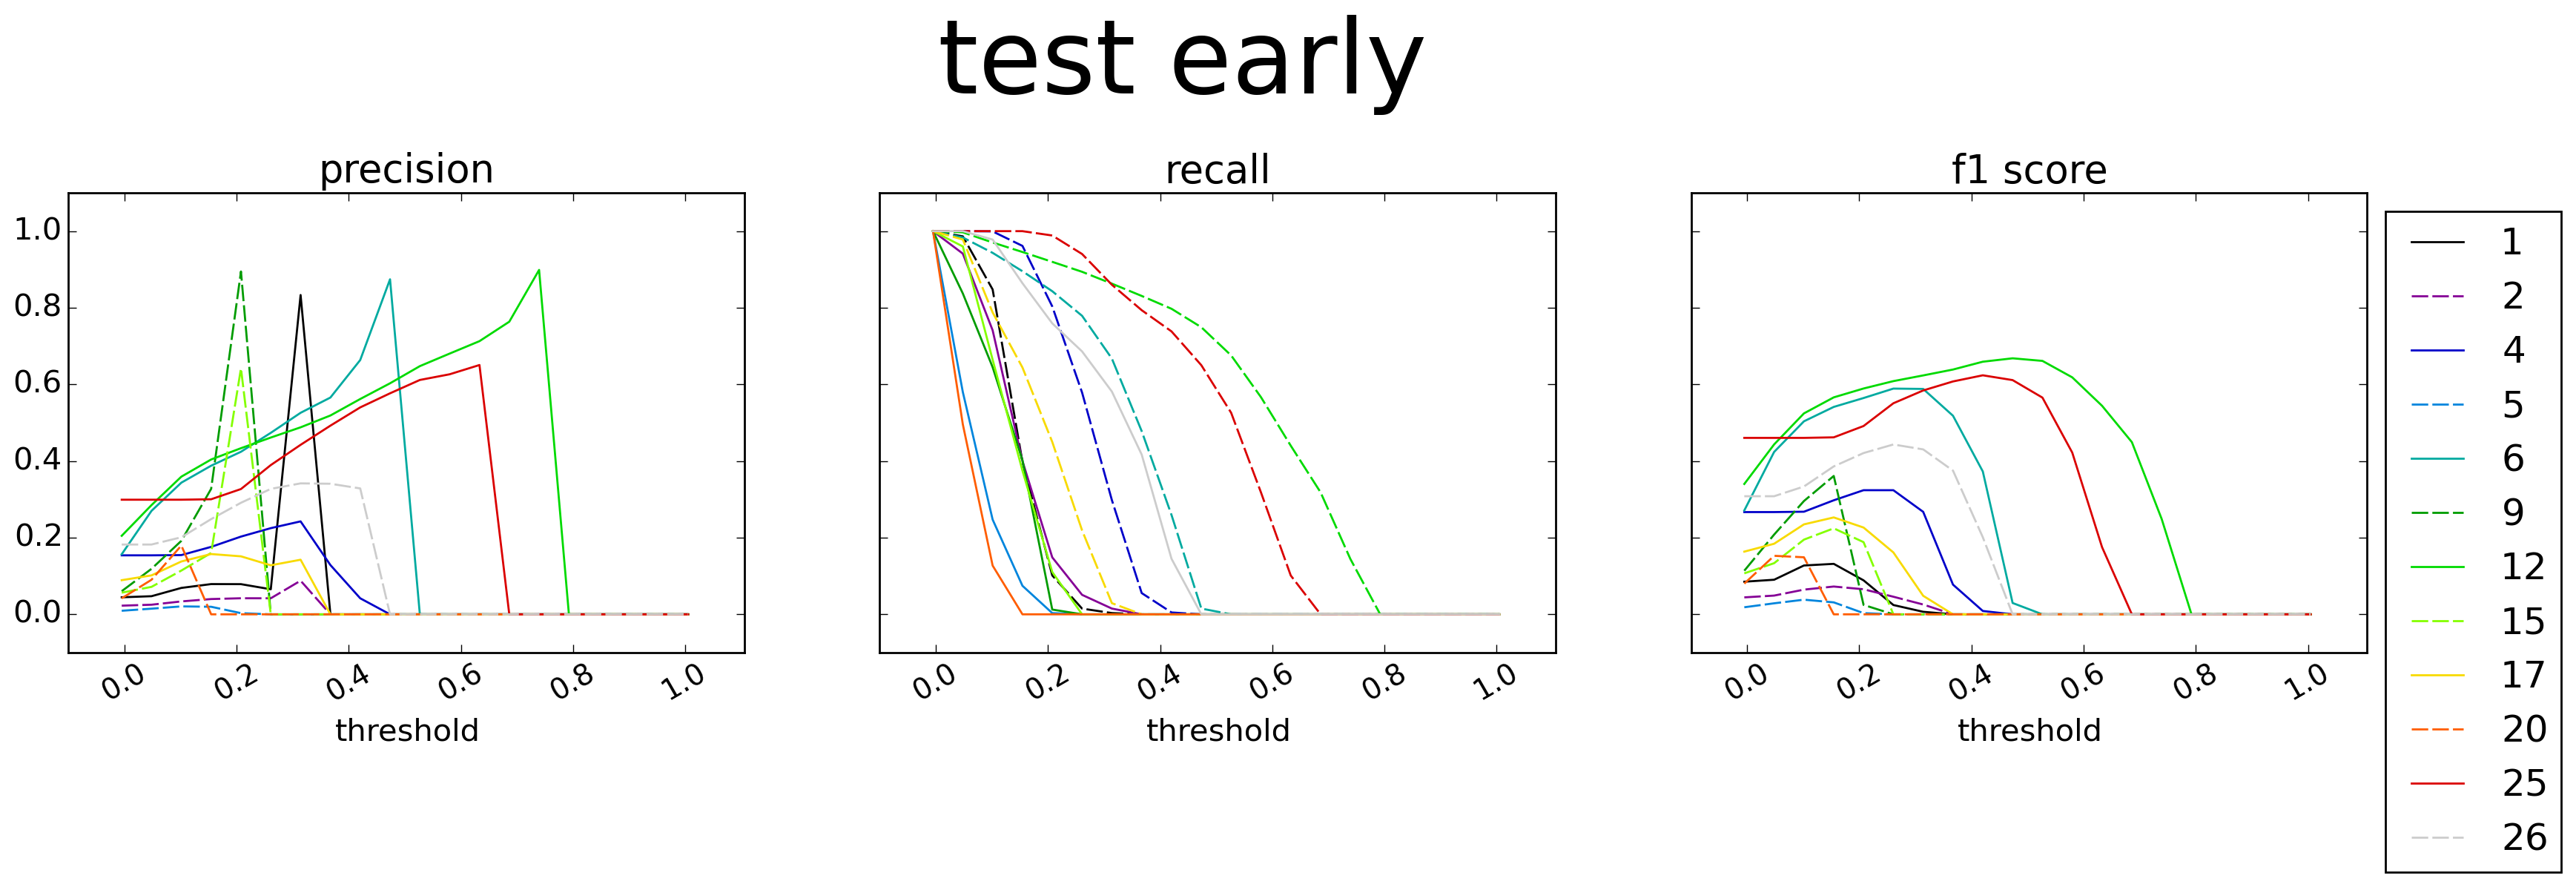

Test ROC values for each class:
(values for p,r,f1 are maximums)
class	roc	roc	f1	p	r	
1 	0.69 	poor 	0.13 	0.83 	1.0
2 	0.66 	poor 	0.07 	0.09 	1.0
4 	0.65 	poor 	0.32 	0.24 	1.0
5 	0.64 	poor 	0.04 	0.02 	1.0
6 	0.89 	good 	0.59 	0.87 	1.0
9 	0.82 	good 	0.36 	0.89 	1.0
12 	0.9 	good 	0.67 	0.9 	1.0
15 	0.75 	fair 	0.22 	0.64 	1.0
17 	0.68 	poor 	0.25 	0.16 	1.0
20 	0.75 	fair 	0.15 	0.18 	1.0
25 	0.79 	fair 	0.62 	0.65 	1.0
26 	0.72 	fair 	0.44 	0.34 	1.0
average roc =  0.745046878335
best thresholds
au	best roc	best f1		col3-col2
1 	0.07 		0.15 		0.08
2 	0.02 		0.15 		0.13
4 	0.36 		0.21 		-0.15
5 	0.01 		0.1 		0.09
6 	0.01 		0.26 		0.25
9 	0.02 		0.15 		0.13
12 	0.12 		0.47 		0.35
15 	0.01 		0.15 		0.14
17 	0.05 		0.15 		0.1
20 	0.01 		0.05 		0.04
25 	0.46 		0.42 		-0.04
26 	0.08 		0.26 		0.18


In [5]:
r.au('test',smooth=False,model='final')
r.au('test',smooth=False,model='early')

In [6]:
r.test_confusion('final')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  1 threshold:  0.79
	[  481 	 2534 	]
	[  795 	 64020 	]
	roc:	0.68
	f1:	0.22
	p:	0.38
	r:	0.16
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  2 threshold:  0.74
	[  410 	 1124 	]
	[  854 	 65442 	]
	roc:	0.76
	f1:	0.29
	p:	0.32
	r:	0.27
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  4 threshold:  0.69
	[  5437 	 5006 	]
	[  7498 	 49889 	]
	roc:	0.76
	f1:	0.47
	p:	0.42
	r:	0.52
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  5 threshold:  0.1
	[  128 	 503 	]
	[  1712 	 65487 	]
	roc:	0.78
	f1:	0.1
	p:	0.07
	r:	0.2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  6 threshold:  0.05
	[  6653 	 3987 	]
	[  6714 	 50476 	]
	roc:	0.84
	f1:	0.55
	p:	0.5
	r:	0.63
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  9 threshold:  0.31
	[  1849 	 2245 	]
	[  2251 	 61485 	]
	roc:	0.85
	f1:	0.45
	p:	0.45
	r:	0.45
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  12 threshold:  0.37
	[  10454 	 3449 	]
	[  4075 	 49852 	]
	roc:	0.93
	f1:	0.74
	p:	0.72
	r

## 

In [7]:
# from results import prefix
# from os.path import join
# path = join(join('/home/luka/v/lm1015-tmp/data',join(date,prefix(ID,3))),'results.html')
# !ipython nbconvert --to html results.ipynb
# !cp 'results.html' $path